O conjunto de dados de fraude com cartão de crédito do Kaggle contém transações realizadas em setembro de 2013 por portadores de cartão europeus. Ele possui 284.807 registros, com 492 casos de fraude (aproximadamente 0,172% das transações). As features são resultados de uma transformação PCA, com exceção de Time, Amount e Class.


Objetivo:

O objetivo principal é identificar transações fraudulentas, enfrentando o desafio de trabalhar com dados desbalanceados

Abordagem:

  Exploração e Análise dos Dados (EDA)

  Preparo e Tratamento dos Dados
  
  Construção e Avaliação de Modelos
  
  Conclusões e Insights


#1 Imports e Configurações



In [ ]:
# Instalando e atualizando o pacote kaggle
!pip install kaggle --upgrade --quiet

In [ ]:
# Importando bibliotecas essenciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Fazendo o upload do kaggle.json para autenticação
from google.colab import files
files.upload()  # Faça o upload do arquivo kaggle.json

# Configurando as credenciais
import os
os.makedirs('/root/.kaggle', exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

# Baixando o dataset diretamente do Kaggle
!kaggle datasets download -d mlg-ulb/creditcardfraud

# Extraindo o conteúdo
import zipfile
with zipfile.ZipFile('creditcardfraud.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 85% 56.0M/66.0M [00:00<00:00, 136MB/s]
100% 66.0M/66.0M [00:00<00:00, 133MB/s]


#2 Carregar base de dados

In [ ]:
# Carregando o dataset baixado
credit_card_df = pd.read_csv('creditcard.csv')

#3 Exploração e Análise dos Dados (EDA)

In [ ]:
# Exibindo as primeiras linhas
credit_card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Informações gerais
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# Resumo estatístico
credit_card_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# Verificando valores nulos
credit_card_df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


Transações legítimas: 284315 (99.83%)
Transações fraudulentas: 492 (0.17%)


<ipython-input-9-de1e6987da64>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=credit_card_df, palette=['#4CAF50', '#F44336'])


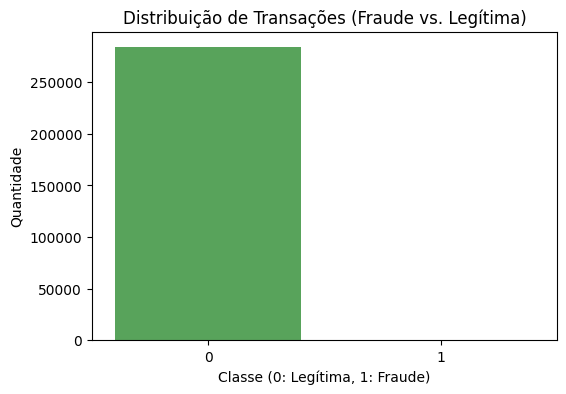

In [ ]:
# Contagem das classes corretamente
class_counts = credit_card_df['Class'].value_counts()

# Acessando valores diretamente da Série
legitimas = class_counts[0] if 0 in class_counts else 0
fraudes = class_counts[1] if 1 in class_counts else 0
total = len(credit_card_df)

# Exibindo a distribuição em números e porcentagens
print(f"Transações legítimas: {legitimas} ({legitimas / total:.2%})")
print(f"Transações fraudulentas: {fraudes} ({fraudes / total:.2%})")

# Visualização gráfica
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=credit_card_df, palette=['#4CAF50', '#F44336'])
plt.title('Distribuição de Transações (Fraude vs. Legítima)')
plt.xlabel('Classe (0: Legítima, 1: Fraude)')
plt.ylabel('Quantidade')
plt.show()

#4 Visualização


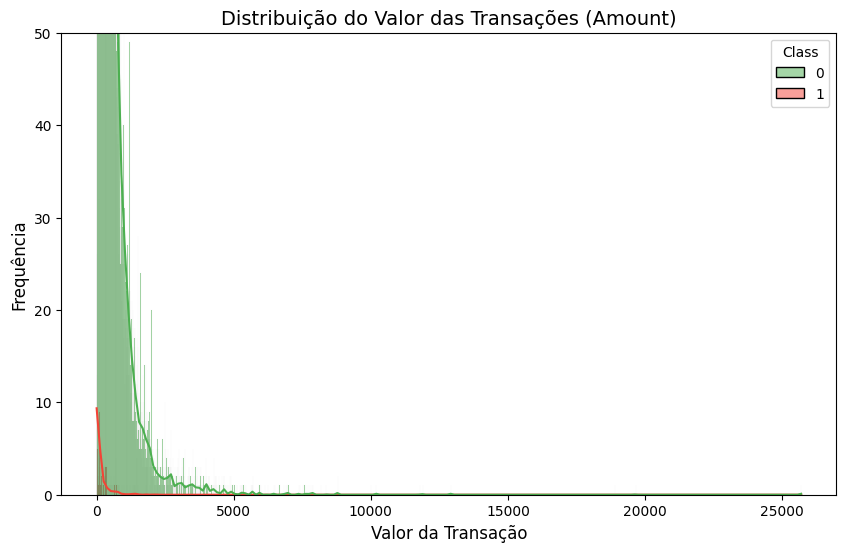

In [ ]:
# Visualizando a distribuição do valor das transações (Amount) com ajustes no gráfico
plt.figure(figsize=(10, 6))
sns.histplot(data=credit_card_df, x='Amount', hue='Class', kde=True, palette=['#4CAF50','#F44336'], bins=5000)

# Ajustando o eixo Y para torná-lo mais legível
plt.ylim(0, 50)  # Ajuste o limite superior do eixo y conforme necessário

# Títulos e rótulos
plt.title('Distribuição do Valor das Transações (Amount)', fontsize=14)
plt.xlabel('Valor da Transação', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

plt.show()

In [ ]:
credit_card_df['Amount'].describe()

,Amount
count,284807.000000
mean,88.349619
std,250.120109
min,0.000000
25%,5.600000
50%,22.000000
75%,77.165000
max,25691.160000


In [ ]:
# Calculando a correlação entre as variáveis numéricas
corr_matrix = credit_card_df.corr()

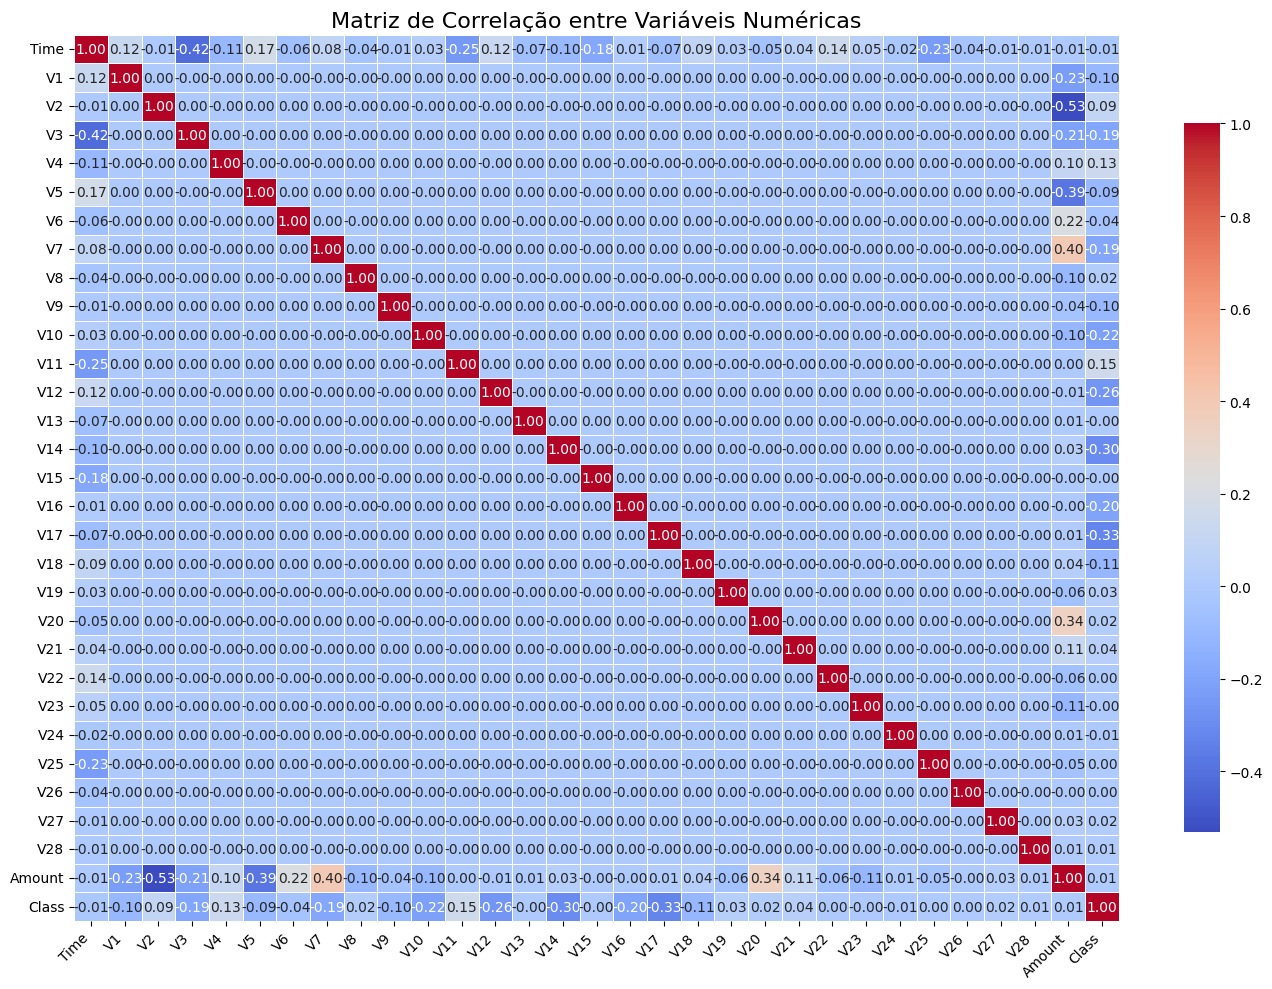

In [ ]:
# Criando um gráfico de heatmap com ajustes
plt.figure(figsize=(14, 10))  # Aumentar o tamanho do gráfico
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={"shrink": 0.8})

# Rotacionando os rótulos das colunas e linhas para melhorar a legibilidade
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.title('Matriz de Correlação entre Variáveis Numéricas', fontsize=16)
plt.tight_layout()  # Ajustando a disposição do gráfico para evitar sobreposição
plt.show()

In [ ]:
# Remover a coluna 'Time' (não é útil para modelagem)
credit_card_df = credit_card_df.drop(columns=['Time'])

# Separar variáveis independentes e dependentes
X = credit_card_df.drop(columns=['Class'])  # Variáveis independentes
y = credit_card_df['Class']  # Variável dependente

# Normalizar as variáveis (especialmente 'Amount')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Pré-processamento concluído. Dados divididos em treino e teste.")

Pré-processamento concluído. Dados divididos em treino e teste.


#5 Treinamento do modelo

In [ ]:
# Inicializar o modelo de Regressão Logística
model = LogisticRegression()

# Treinar o modelo com os dados de treino
model.fit(X_train, y_train)

# Fazer previsões com os dados de teste
y_pred = model.predict(X_test)

In [ ]:
# 4. Avaliar o modelo
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962


Matriz de Confusão:
 [[56855     9]
 [   41    57]]


In [ ]:
# Inicializar o modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=42)

# Treinar o modelo com os dados de treino
rf_model.fit(X_train, y_train)

# Fazer previsões com os dados de teste
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# 4. Avaliar o modelo
print("Relatório de Classificação do Random Forest:\n", classification_report(y_test, y_pred_rf))
print("\nMatriz de Confusão do Random Forest:\n", confusion_matrix(y_test, y_pred_rf))

Relatório de Classificação do Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.71      0.82        98

    accuracy                           1.00     56962
   macro avg       0.99      0.86      0.91     56962
weighted avg       1.00      1.00      1.00     56962


Matriz de Confusão do Random Forest:
 [[56862     2]
 [   28    70]]


#6 Relatório do modelo

Relatório de Classificação do Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.71      0.82        98

    accuracy                           1.00     56962
   macro avg       0.99      0.86      0.91     56962
weighted avg       1.00      1.00      1.00     56962



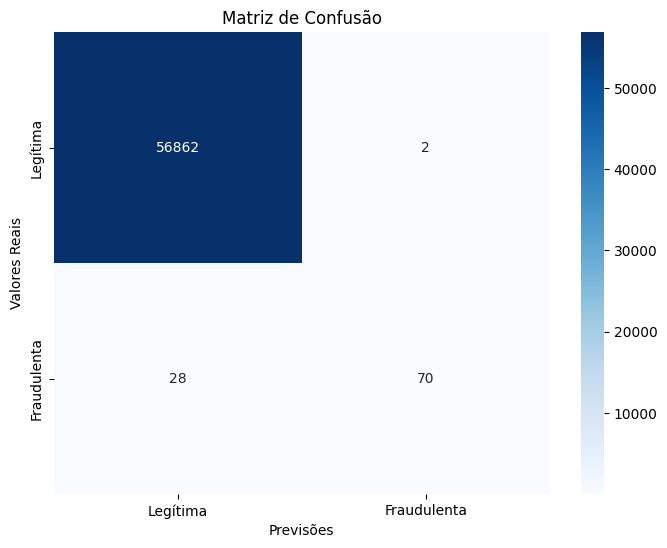

In [ ]:
# Exibir o relatório de classificação
print("Relatório de Classificação do Random Forest:\n", classification_report(y_test, y_pred_rf))

# Exibir a matriz de confusão
cm = confusion_matrix(y_test, y_pred_rf)

# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Legítima", "Fraudulenta"], yticklabels=["Legítima", "Fraudulenta"])
plt.title("Matriz de Confusão")
plt.xlabel("Previsões")
plt.ylabel("Valores Reais")
plt.show()

#7 Insights e Conclusão

Insight: Após a implementação, o modelo pode ser monitorado em tempo real, oferecendo uma redução significativa nas fraudes financeiras, com impacto direto na segurança de transações e satisfação do cliente. O uso de ferramentas de monitoramento pode gerar insights valiosos para ajustes contínuos e melhorias na performance.

Melhorias nas métricas: Espera-se uma melhora significativa nas métricas de recall (15-25%) e precisão (10-20%) com ajustes de parâmetros e técnicas de balanceamento de classes.


Impacto na detecção de fraudes: Melhorando o recall, você aumentaria a capacidade do modelo de identificar fraudes, reduzindo o risco de perdas financeiras para as empresas e clientes.

Solução escalável: Um modelo bem ajustado pode ser usado em produção para detectar fraudes em tempo real, impactando diretamente a segurança nas transações financeiras.

Esses insights ajudam a entender o impacto do modelo não apenas em termos de números, mas também como ele pode ser aplicado para trazer valor real para o negócio, especialmente em setores que lidam com transações financeiras
